# 6.2 Exploring relationships

### This script contains the following:

#### 1. Importing Visualization Libraries and Data
#### 2. Exploring Relationships
     Correlations
     Scatterplots
     Pair Plots
     Categorical Plots

### 1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [3]:
# Ensure the charts are displayed in the notebook without the need to "call" them specifically
%matplotlib inline

In [5]:
# Define path

path = r'C:\Users\kasia\Desktop\Career Foundry\Achievement 6\World Universities Ranking\02 Data\Prepared Data'

In [7]:
# Import data

df = pd.read_csv(os.path.join(path, 'cleaned_data.csv'))

In [141]:
df.head()

Unnamed: 0  world_rank                            institution  \
0           0           1                     Harvard University   
1           1           2  Massachusetts Institute of Technology   
2           2           3                    Stanford University   
3           3           4                University of Cambridge   
4           4           5     California Institute of Technology   

          country  national_rank  quality_of_education  alumni_employment  \
0             USA              1                     7                  9   
1             USA              2                     9                 17   
2             USA              3                    17                 11   
3  United Kingdom              1                    10                 24   
4             USA              4                     2                 29   

   quality_of_faculty  publications  influence  citations  broad_impact  \
0                   1             1          1          1      496.6995   
1                   3            12          4          4      496.6995   
2                   5             4          2          2      496.6995   
3                   4            16         16         11      496.6995   
4                   7            37         22         22      496.6995   

   patents   score  year  
0        5  100.00  2012  
1        1   91.67  2012  
2       15   89.50  2012  
3       50   86.17  2012  
4       18   85.21  2012

### 2. Exploring Relationships

### Correlations:

In [143]:
df.columns

Index(['Unnamed: 0', 'world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'broad_impact', 'patents',
       'score', 'year'],
      dtype='object')

In [145]:
df.dtypes

Unnamed: 0                int64
world_rank                int64
institution              object
country                  object
national_rank             int64
quality_of_education      int64
alumni_employment         int64
quality_of_faculty        int64
publications              int64
influence                 int64
citations                 int64
broad_impact            float64
patents                   int64
score                   float64
year                      int64
dtype: object

In [9]:
# Create a subset excluding the 'Unnamed: 0', 'institution', 'country', 'quality_of_education', 'national_rank', 'influence', 'year','broad_impact', 'score' columns

sub = df[['world_rank', 'alumni_employment', 'quality_of_faculty','publications','citations', 'patents']]

In [11]:
sub

world_rank  alumni_employment  quality_of_faculty  publications  \
0              1                  9                   1             1   
1              2                 17                   3            12   
2              3                 11                   5             4   
3              4                 24                   4            16   
4              5                 29                   7            37   
...          ...                ...                 ...           ...   
2195         996                567                 218           926   
2196         997                566                 218           997   
2197         998                549                 218           830   
2198         999                567                 218           886   
2199        1000                567                 218           861   

      citations  patents  
0             1        5  
1             4        1  
2             2       15  
3            11       50  
4            22       18  
...         ...      ...  
2195        812      816  
2196        645      871  
2197        812      824  
2198        812      651  
2199        812      547  

[2200 rows x 6 columns]

In [13]:
# Create a correlation matrix using pandas

sub.corr()

world_rank  alumni_employment  quality_of_faculty  \
world_rank            1.000000           0.668529            0.663864   
alumni_employment     0.668529           1.000000            0.558618   
quality_of_faculty    0.663864           0.558618            1.000000   
publications          0.923037           0.572096            0.634423   
citations             0.856573           0.559200            0.652186   
patents               0.698214           0.528219            0.555107   

                    publications  citations   patents  
world_rank              0.923037   0.856573  0.698214  
alumni_employment       0.572096   0.559200  0.528219  
quality_of_faculty      0.634423   0.652186  0.555107  
publications            1.000000   0.829912  0.671558  
citations               0.829912   1.000000  0.598728  
patents                 0.671558   0.598728  1.000000

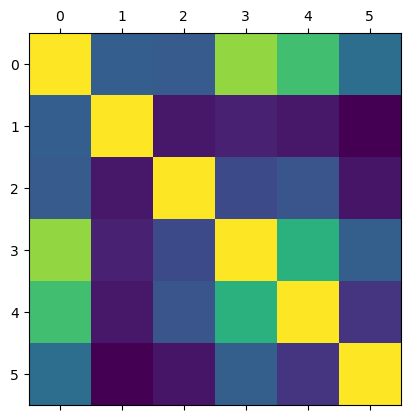

In [15]:
# Create a correlation heatmap using matplotlib

plt.matshow(sub.corr())
plt.show()

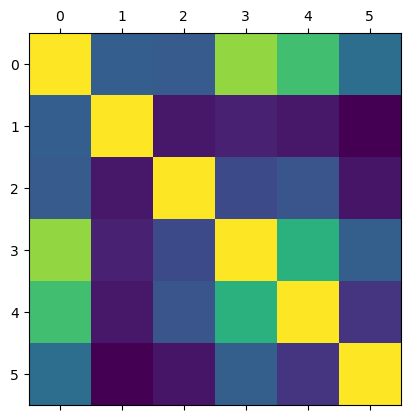

In [61]:
# Save figure
plt.matshow(sub.corr())
plt.savefig("out1.png")

In [38]:
#current dir
cwd = os.getcwd()
cwd

'C:\\Users\\kasia\\Desktop\\Career Foundry\\Achievement 6\\World Universities Ranking\\03 Scripts'

#### Create a correlation heatmap using seaborn:

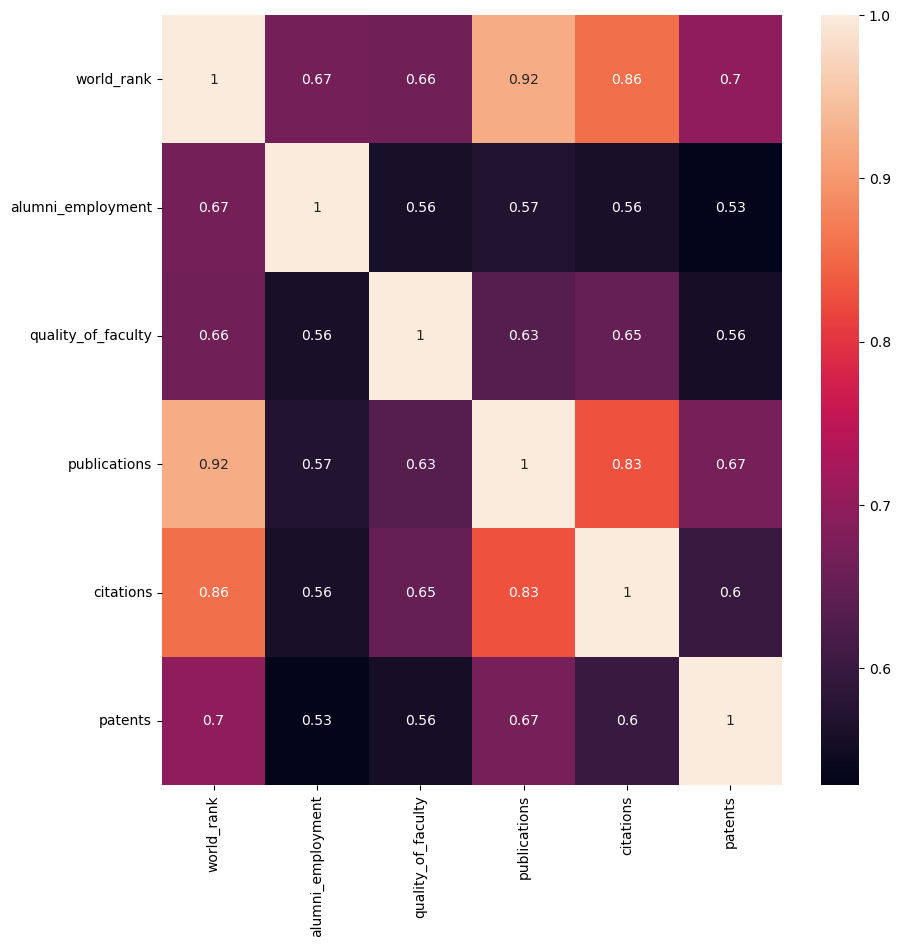

In [19]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

#### I'm basing my observations also on the correlation matrix as my heatmap is missing most of its numbers: world_rank has a very strong positive correlation with publications (0.923), citations (0.857), and patents (0.698), suggesting that higher-ranked universities tend to produce more publications, have more citations, and generate more patents. Alumni_employment is positively correlated with world_rank (0.669) and other factors such as publications (0.572) and citations (0.559), suggesting that universities with better alumni employment rates are also higher-ranked and have more academic output. Quality_of_faculty shows a strong positive correlation with world_rank (0.664) and citations (0.652), highlighting that universities with better faculty quality tend to have higher rankings and more citations. Publications and citations are strongly correlated (0.830), which shows that universities with a higher number of publications also tend to receive more citations. Patents are positively correlated with publications (0.672) and citations (0.599), indicating that universities producing more patents also tend to have a higher number of publications and citations.

In [25]:
# Save figure
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

### Scatterplots:

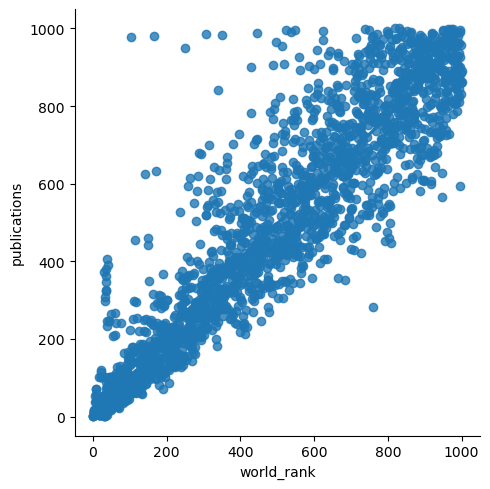

In [157]:
# Create a scatterplot for the "world_rank" and "publications" columns in seaborn

sns.lmplot(x = 'world_rank', y = 'publications', data = sub)

#### In the scatterplot I can see a very strong linear upward trend, there's a lot of data points clustered around the trend line indicating its strength. It strongly suggests that universities with better world rankings tend to have more publications. A tight cluster suggests that the majority of universities follow the general trend of having more publications as their world rank improves.

### Pair Plots:

In [56]:
# Dropping 'Unnamed: 0' column
df = df.drop(columns = ['Unnamed: 0'])

C:\Users\kasia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kasia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kasia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kasia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

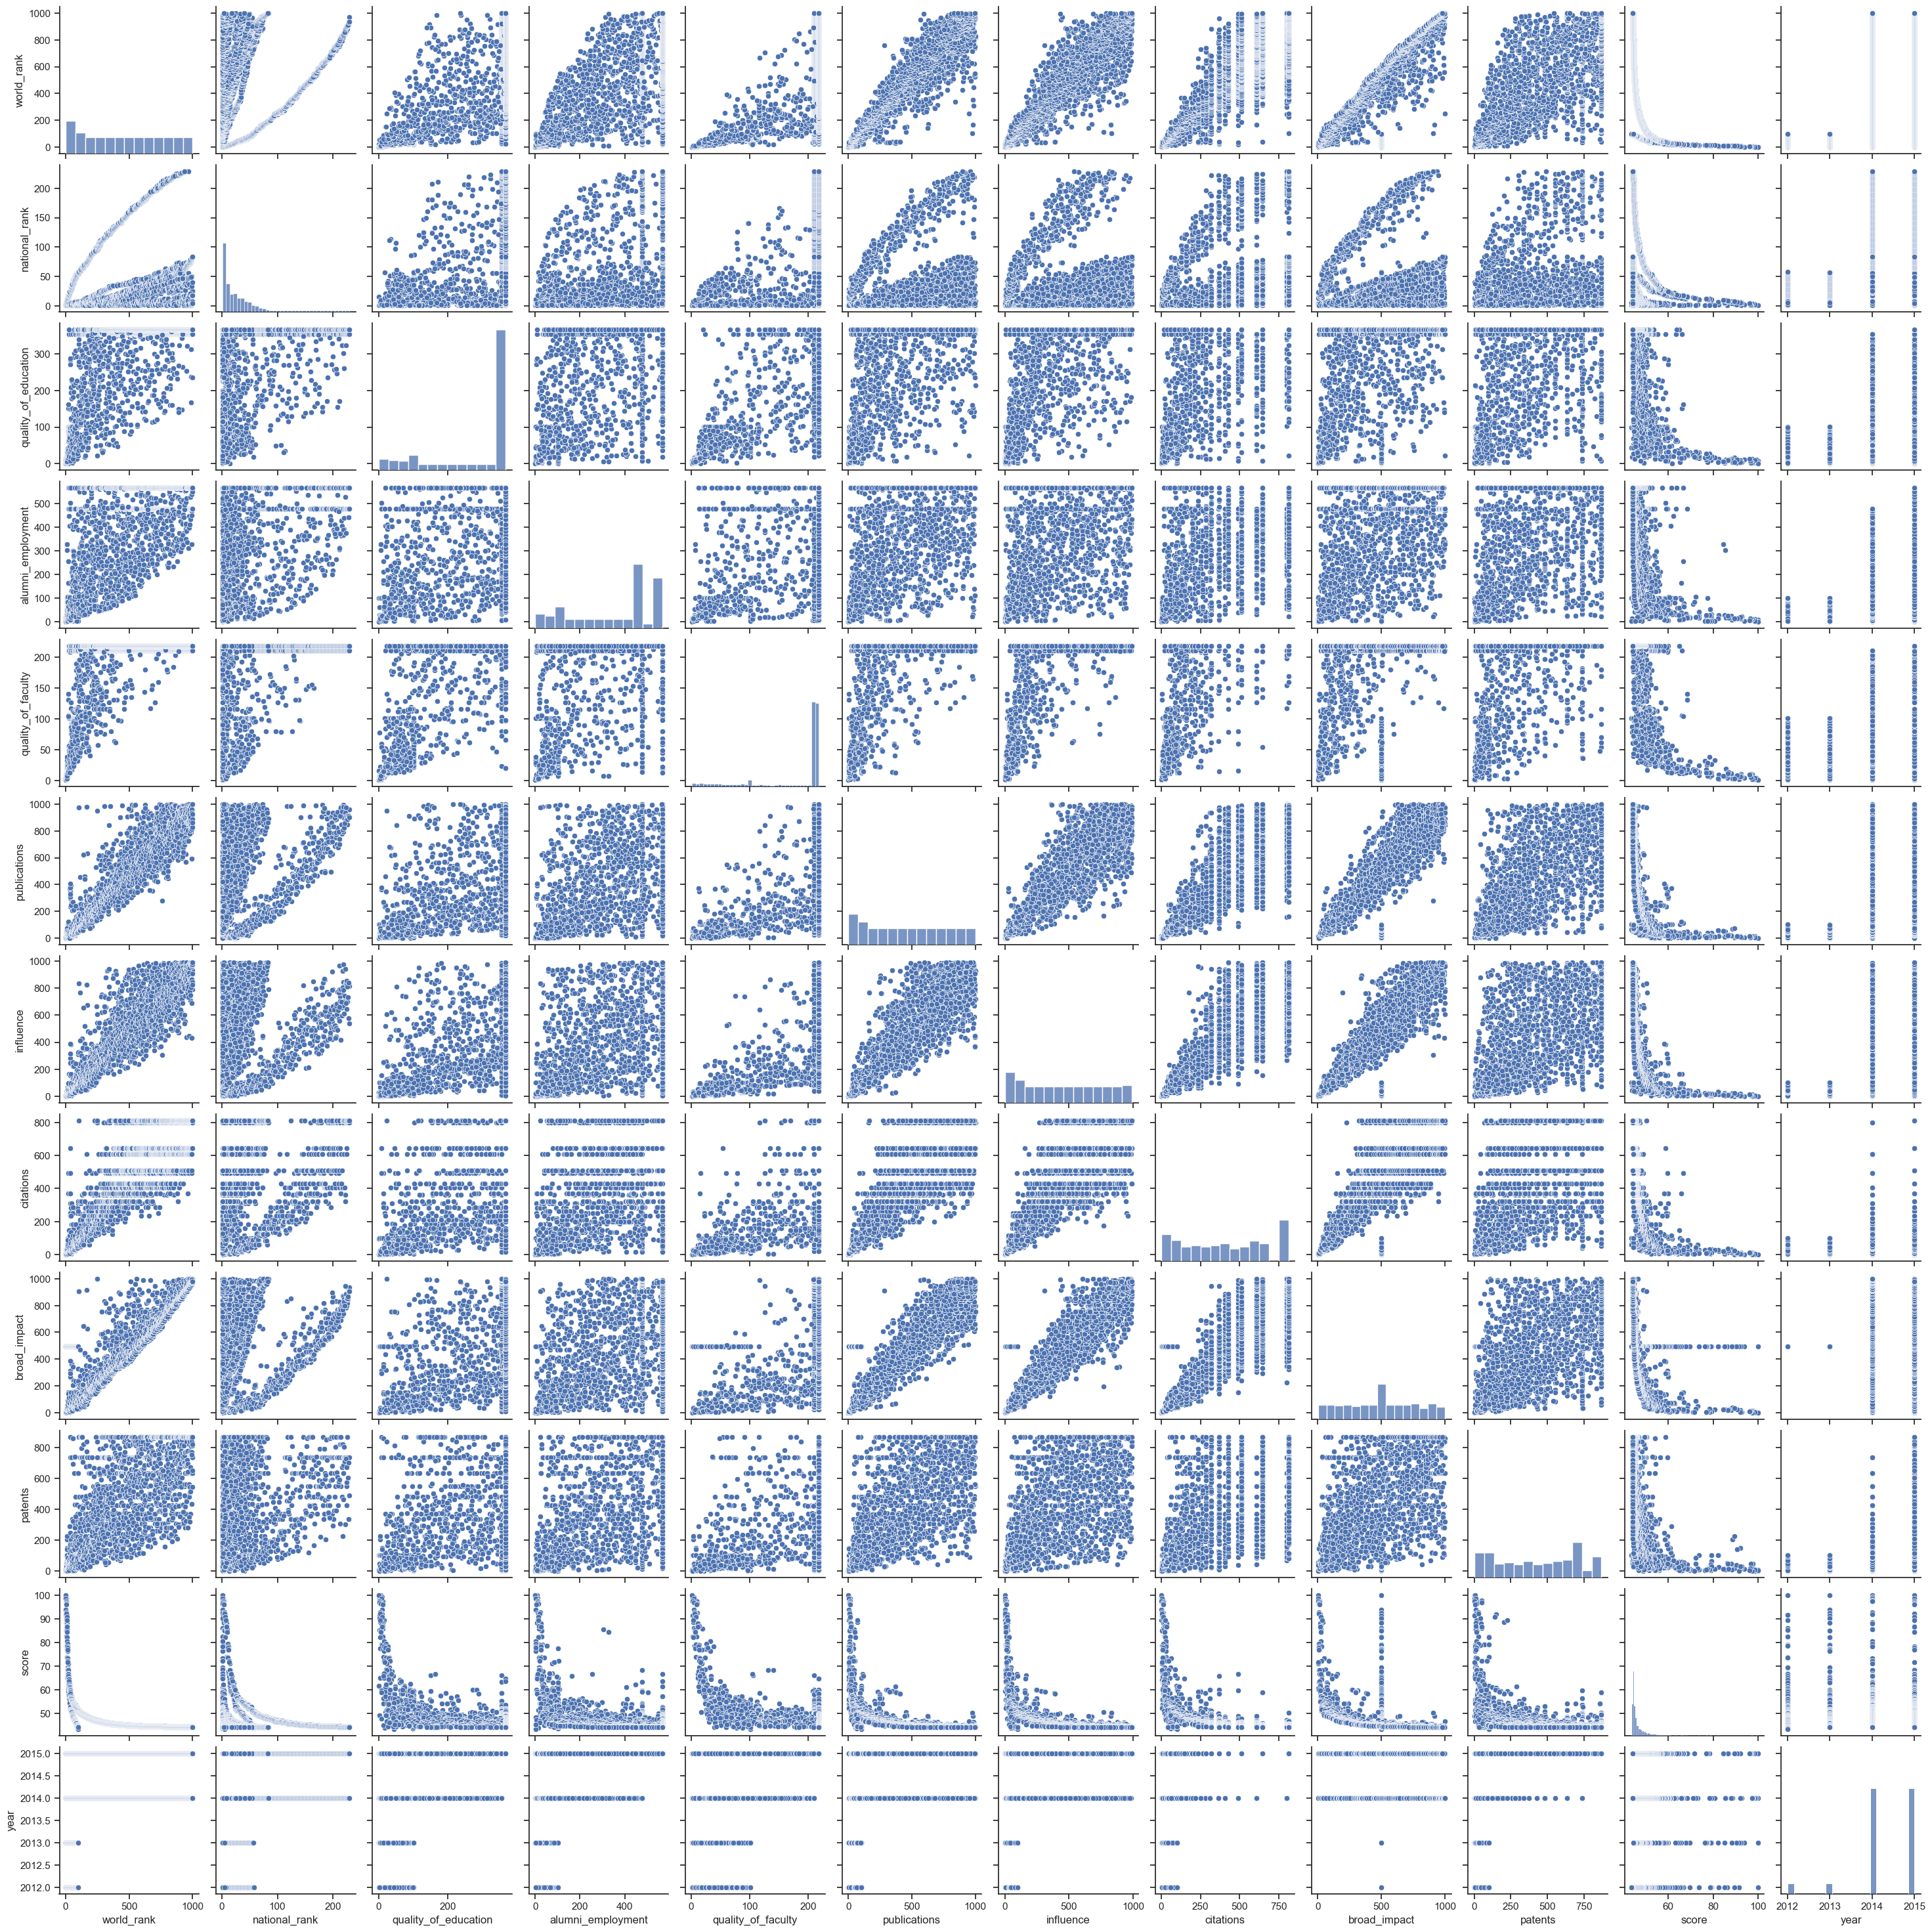

In [58]:
# Create a pair plot 

g = sns.pairplot(df)

#### I would like to explore further the corelation between world_rank and broad_impact, citationas, influence, publications, quality_of_faculty and national_rank. All of those scatterplots suggest they follow some kind of a pattern. Publications seem to be in a positive corelation with influence and broad_impact, I would like to explore it too. Citations have an usual segmented corelation with each variable, will look into it too. 

### Categorical Plots:

##### Creating a categorical variable that splits the "publications" column into categories

C:\Users\kasia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='publications', ylabel='Count'>

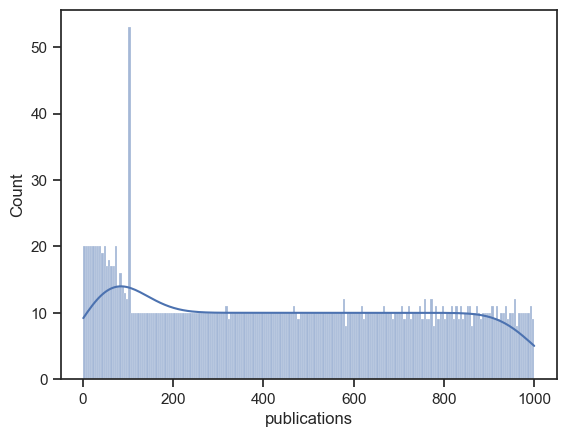

In [60]:
sns.histplot(df['publications'], bins = 200, kde = True)

In [62]:
df.loc[df['publications'] < 350, 'publications_number'] = 'High_Publication_Rank'

In [64]:
df.loc[(df['publications'] >= 350) & (df['publications'] < 700), 'publications_number'] = 'Middle_Publication_Rank'

In [66]:
df.loc[df['publications'] >= 700, 'publications_number'] = 'Low_Publication_Rank'

In [68]:
df['publications_number'].value_counts(dropna = False)

publications_number
High_Publication_Rank      898
Middle_Publication_Rank    700
Low_Publication_Rank       602
Name: count, dtype: int64

In [173]:
df.columns

Index(['world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'broad_impact', 'patents',
       'score', 'year', 'publications_number'],
      dtype='object')

In [175]:
df.head()

world_rank                            institution         country  \
0           1                     Harvard University             USA   
1           2  Massachusetts Institute of Technology             USA   
2           3                    Stanford University             USA   
3           4                University of Cambridge  United Kingdom   
4           5     California Institute of Technology             USA   

   national_rank  quality_of_education  alumni_employment  quality_of_faculty  \
0              1                     7                  9                   1   
1              2                     9                 17                   3   
2              3                    17                 11                   5   
3              1                    10                 24                   4   
4              4                     2                 29                   7   

   publications  influence  citations  broad_impact  patents   score  year  \
0             1          1          1      496.6995        5  100.00  2012   
1            12          4          4      496.6995        1   91.67  2012   
2             4          2          2      496.6995       15   89.50  2012   
3            16         16         11      496.6995       50   86.17  2012   
4            37         22         22      496.6995       18   85.21  2012   

  publications_number  
0    Low_no_of_public  
1    Low_no_of_public  
2    Low_no_of_public  
3    Low_no_of_public  
4    Low_no_of_public

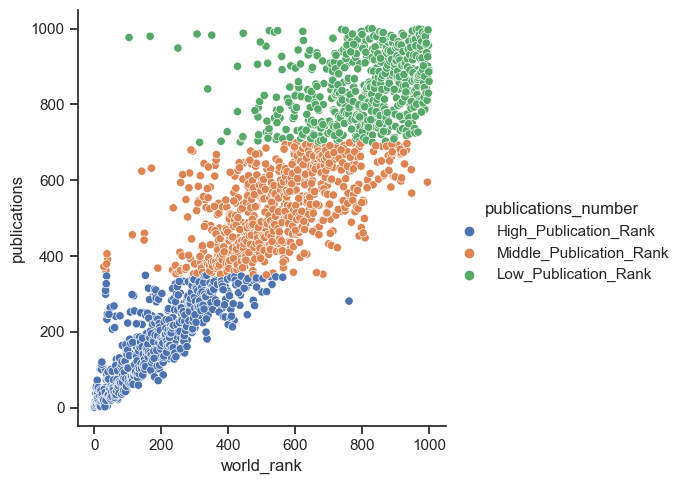

In [70]:
# Create a categorical plot in seaborn using the publications categories created above

sns.set(style="ticks")
g = sns.relplot(x="world_rank", y="publications", hue="publications_number", data=df)

In [72]:
# fig = g.get_figure()
g.savefig("publications and world_rank.png")

#### The scatter plot illustrates a positive correlation between world_rank and publications, indicating that institutions with a higher number of publications generally have better world rankings (lower rank values). The data is categorized into three distinct groups: High_Publication_Rank (blue), Middle_Publication_Rank (orange), and Low_Publication_Rank (green). Institutions with low publication numbers (green) are concentrated at the higher end of the world_rank axis and the lower end of the publications axis, showing poorer rankings. Those with a moderate number of publications (orange) are spread out in the mid-range of both axes, indicating intermediate rankings. Institutions with high publication numbers (blue) cluster at the lower end of the world_rank axis and the higher end of the publications axis, demonstrating the best rankings. Additionally, the distinct clusters highlight clear groupings where institutions with similar publication numbers tend to have similar world rankings, with a few outliers in each category.